EDA & Feature Engineering

In [1]:
import numpy as n
import random
import pandas as pd
# Code to read csv file into Colaboratory:


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

train = pd.read_csv("train")

In [3]:
train

,id,unix_timestamp,ui_component_position,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,f0,f1,f2,f3,f4,f5,f6,f7,f8,click
0,10000679056417042096,1413849600,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,18993,320,50,2161,0,35,NaN,157,0
1,10010730108771379386,1413849600,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,20634,320,50,2374,3,39,NaN,23,0
2,10017325201002992404,1413849600,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,15705,320,50,1722,0,35,NaN,79,1
3,10018897422996679694,1413849600,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,20366,320,50,2333,0,39,NaN,157,0
4,10024660782388112342,1413849600,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,17614,320,50,1993,2,1063,100083.0,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999994,9985626755387297314,1414710000,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,17037,320,50,1934,2,39,NaN,16,0
1999995,9987260269049664739,1414710000,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,c7a43d7c,...,1005,20632,320,50,2374,3,39,NaN,23,0
1999996,9989166246566057980,1414710000,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1005,22676,320,50,2616,0,35,NaN,51,0
1999997,9995700942528439110,1414710000,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,a99f214a,...,1005,23725,320,50,2716,3,47,100217.0,23,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999999 entries, 0 to 1999998
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     uint64 
 1   unix_timestamp         int64  
 2   ui_component_position  int64  
 3   site_id                object 
 4   site_domain            object 
 5   site_category          object 
 6   app_id                 object 
 7   app_domain             object 
 8   app_category           object 
 9   device_id              object 
 10  device_ip              object 
 11  device_model           object 
 12  device_type            int64  
 13  device_conn_type       int64  
 14  f0                     int64  
 15  f1                     int64  
 16  f2                     int64  
 17  f3                     int64  
 18  f4                     int64  
 19  f5                     int64  
 20  f6                     int64  
 21  f7                     float64
 22  f8                

### Features

Target feature : click <br>
site features : site_id, site_domain, site_category<br>
app feature: app_id, app_domain, app_category<br>
device feature: device_id, device_ip, device_model, device_type, device_conn_type<br>
anonymized categorical features: f0-f8<br>

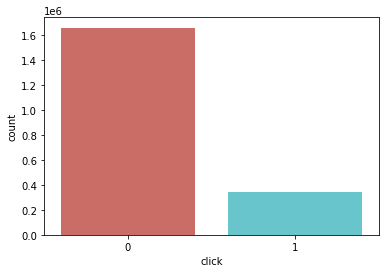

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='click',data=train, palette='hls')
plt.show()

In [6]:
train['click'].value_counts()/len(train)

0    0.830121
1    0.169879
Name: click, dtype: float64

The overall click through rate is approx. 17%, and approx. 83% is not clicked.

In [7]:
train['date'] = pd.to_datetime(train['unix_timestamp'],unit='s')

In [8]:
train.date.describe()

<ipython-input-8-34098997b363>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.date.describe()


count                 1999999
unique                    240
top       2014-10-22 09:00:00
freq                    22067
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: date, dtype: object

The data covers 10 days of click streams data from 2014–10–21 to 2014–10–30, that is 240 hours.

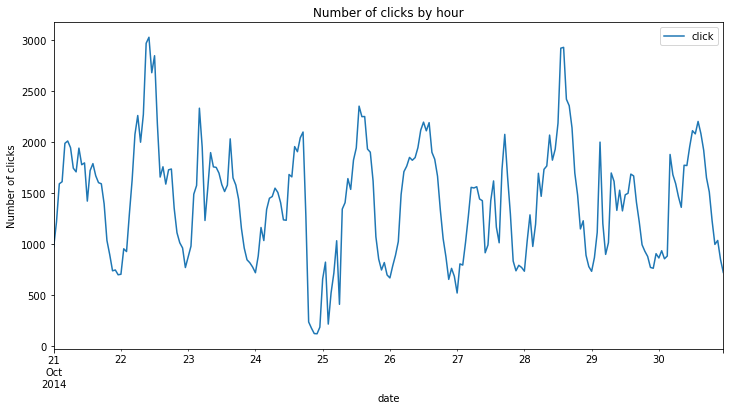

In [9]:
train.groupby('date').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

The hourly clicks pattern looks pretty similar every day. However, there were a couple of peak hours, one is sometime in the mid of the day on Oct 22, and another is sometime in the mid of the day on Oct 28. And one very low click hour is close to mid-night on Oct 24

### Feature engineering for date time features

Text(0.5, 1.0, 'click trends by hour of day')

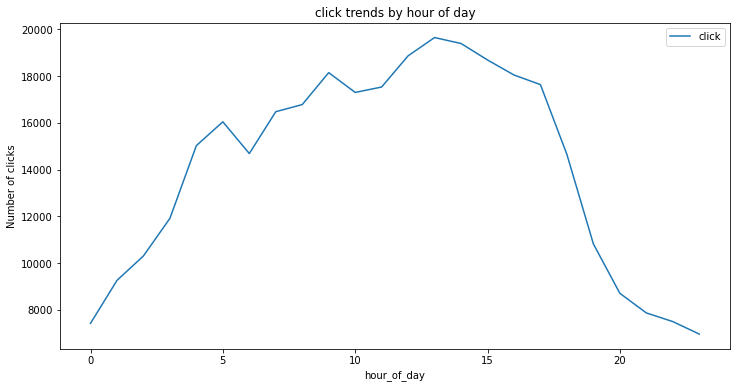

In [10]:
train['hour_of_day'] = train.date.apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day')


In general, the highest number of clicks is at hour 13 and 14 (1pm and 2pm), and the least number of clicks is at hour 0 (mid-night). It seems a useful feature for roughly estimation.

In [11]:
train.head(3)

,id,unix_timestamp,ui_component_position,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,f2,f3,f4,f5,f6,f7,f8,click,date,hour_of_day
0,10000679056417042096,1413849600,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,...,320,50,2161,0,35,NaN,157,0,2014-10-21,0
1,10010730108771379386,1413849600,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,320,50,2374,3,39,NaN,23,0,2014-10-21,0
2,10017325201002992404,1413849600,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,320,50,1722,0,35,NaN,79,1,2014-10-21,0


taking impression into consideration

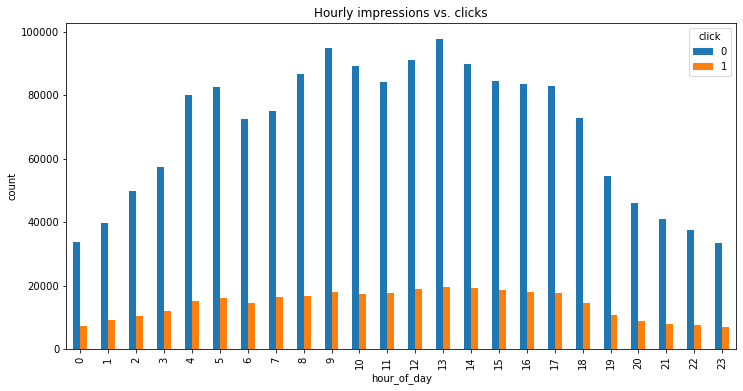

In [12]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

Nothing is surprising here

In [13]:
train.head(3)

,id,unix_timestamp,ui_component_position,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,f2,f3,f4,f5,f6,f7,f8,click,date,hour_of_day
0,10000679056417042096,1413849600,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,...,320,50,2161,0,35,NaN,157,0,2014-10-21,0
1,10010730108771379386,1413849600,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,320,50,2374,3,39,NaN,23,0,2014-10-21,0
2,10017325201002992404,1413849600,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,320,50,1722,0,35,NaN,79,1,2014-10-21,0


with click and impression, I can then calculate CTR as the ration clicks to impression.

### Hourly CTR

Text(0.5, 1.0, 'Hourly CTR')

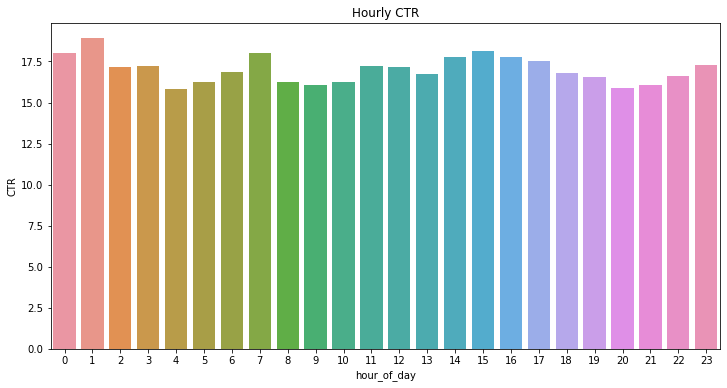

In [14]:
import seaborn as sns

df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR')

Interesting part here is that the most CTR happened during midnight, 1 , 7 and 15 and from our previous observation the least number of clicks happened during midnight.

### Day of the week

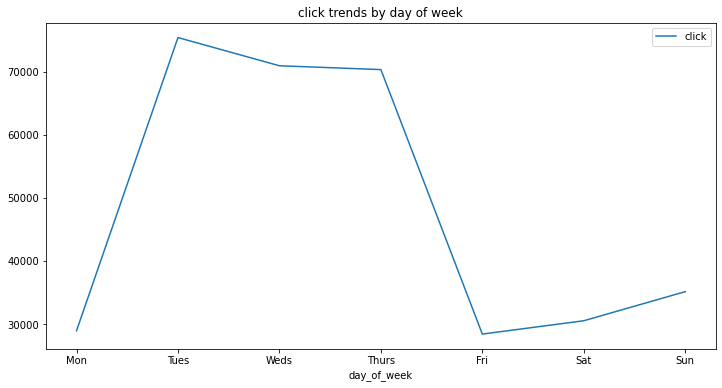

In [15]:
train['day_of_week'] = train['date'].apply(lambda val: val.day_name())
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

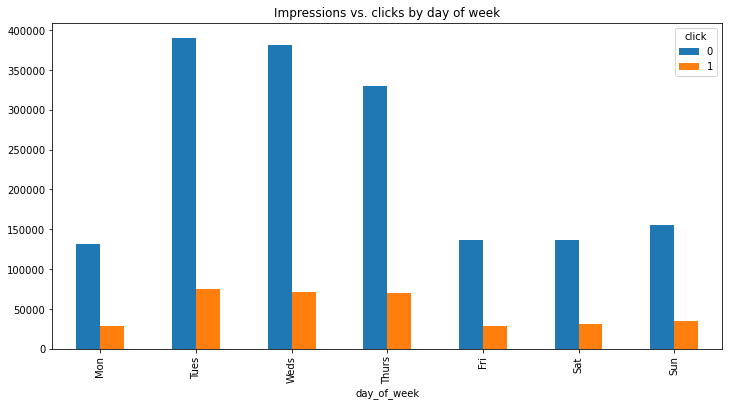

In [16]:
train.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

Tuesdays have the most impressions and clicks, then Wednesdays, followed by Thursdays. Mondays and Fridays have the least number of impressions and clicks

### Day of week CTR

In [17]:
train.head(3)

,id,unix_timestamp,ui_component_position,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,f3,f4,f5,f6,f7,f8,click,date,hour_of_day,day_of_week
0,10000679056417042096,1413849600,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,...,50,2161,0,35,NaN,157,0,2014-10-21,0,Tuesday
1,10010730108771379386,1413849600,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,50,2374,3,39,NaN,23,0,2014-10-21,0,Tuesday
2,10017325201002992404,1413849600,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,50,1722,0,35,NaN,79,1,2014-10-21,0,Tuesday


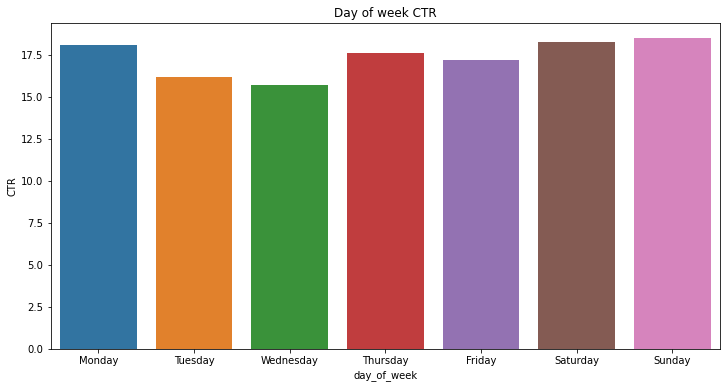

In [18]:
df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

While Tuesdays and Wednesdays have the highest number of impressions and clicks, their CTR are among the lowest. Saturdays and Sundays enjoy the highest CTR. Apparently, people have more time to click over the weekend.


### F0 feature
f0 is one of the anonymized categorical features. Although we don't know its meaning, we still want to have a look its distribution.

In [19]:
print(train.f0.value_counts()/len(train))

1005    0.918428
1002    0.055203
1010    0.022338
1012    0.002804
1007    0.000870
1001    0.000222
1008    0.000136
Name: f0, dtype: float64


In [24]:
f0_values = train.f0.unique()
f0_values.sort()
ctr_avg_list=[]
for i in f0_values:
    ctr_avg=train.loc[n.where((train.f0 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.04054054054054054
for C1 value: 1002,  click through rate: 0.21155553140227887
for C1 value: 1005,  click through rate: 0.16935241521382188
for C1 value: 1007,  click through rate: 0.04195402298850575
for C1 value: 1008,  click through rate: 0.11808118081180811
for C1 value: 1010,  click through rate: 0.09421376608841633
for C1 value: 1012,  click through rate: 0.17692170501159266


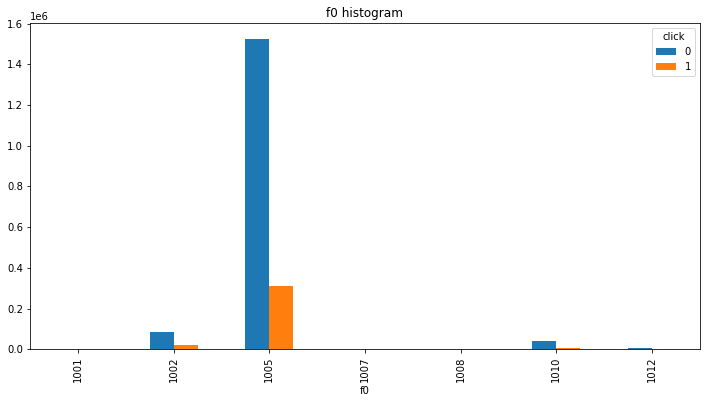

In [25]:
train.groupby(['f0', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='f0 histogram');

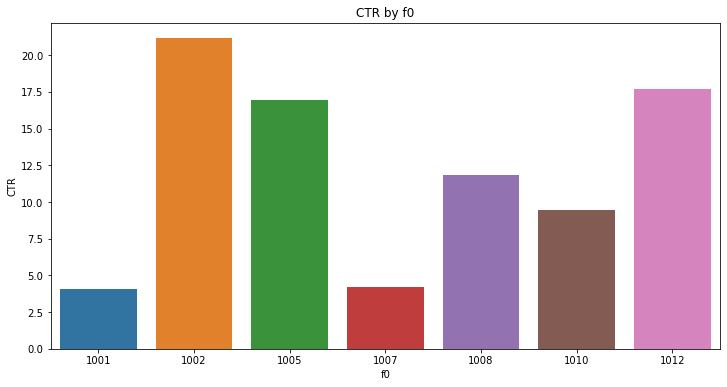

In [27]:

df_f0 = train[['f0','click']].groupby(['f0']).count().reset_index()
df_f0 = df_f0.rename(columns={'click': 'impressions'})
df_f0['clicks'] = df_click[['f0','click']].groupby(['f0']).count().reset_index()['click']
df_f0['CTR'] = df_f0['clicks']/df_f0['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='f0', data=df_f0)
plt.title('CTR by f0');

The average CTR in the data is 0.17.

In [28]:
train['click'].mean()

0.16987858493929248

In [30]:
df_f0.CTR.describe()

count     7.000000
mean     12.180274
std       6.721731
min       4.054054
25%       6.808389
50%      11.808118
75%      17.313706
max      21.155553
Name: CTR, dtype: float64

The important f0 values and CTR pairs are:

1005: 92% of the data and 0.17 CTR

1002: 5.5% of the data and 0.21 CTR

1010: 2.3% of the data and 0.096 CTR

1002 has a much higher than average CTR, and 1010 has a much lower than average CTR, it seems these two f0 values are important for predicting CTR.

### cui_component_position

I have heard that there are many factors that affect the performance of your banner ads, but the most influential one is the banner position. Let's see whether it is true.

In [31]:
print(train.ui_component_position.value_counts()/len(train))

0    0.720299
1    0.277919
7    0.001075
2    0.000330
4    0.000196
5    0.000135
3    0.000046
Name: ui_component_position, dtype: float64


In [33]:
ui_component_position = train.ui_component_position.unique()
ui_component_position.sort()
ctr_avg_list=[]
for i in ui_component_position:
    ctr_avg=train.loc[n.where((train.ui_component_position == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for ui_component_position: {},  click through rate: {}".format(i,ctr_avg))

for ui_component_position: 0,  click through rate: 0.1642547053376445
for ui_component_position: 1,  click through rate: 0.18390790122301823
for ui_component_position: 2,  click through rate: 0.12272727272727273
for ui_component_position: 3,  click through rate: 0.21739130434782608
for ui_component_position: 4,  click through rate: 0.21428571428571427
for ui_component_position: 5,  click through rate: 0.11851851851851852
for ui_component_position: 7,  click through rate: 0.3220102373196836



The important ui_component_position are:

position 0: 72% of the data and 0.16 CTR

position 1: 28% of the data and 0.18 CTR

<AxesSubplot:title={'center':'ui_component_position histogram'}, xlabel='ui_component_position'>

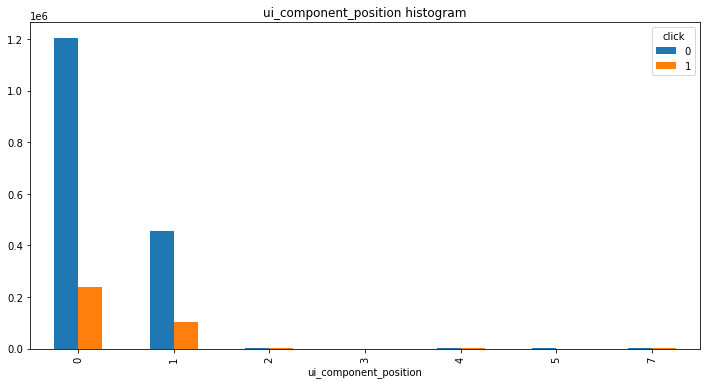

In [35]:
train.groupby(['ui_component_position', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='ui_component_position histogram')

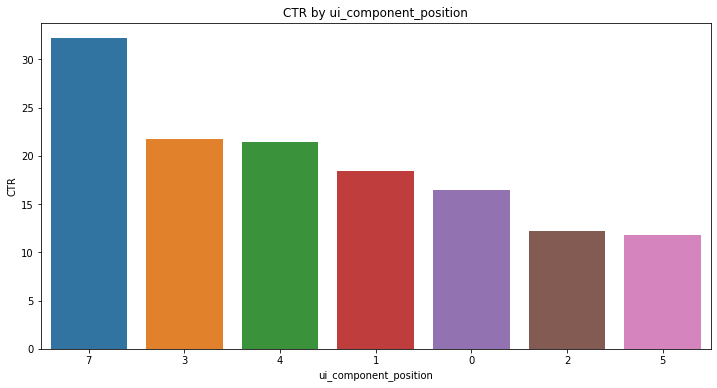

In [37]:
df_banner = train[['ui_component_position','click']].groupby(['ui_component_position']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['ui_component_position','click']].groupby(['ui_component_position']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['ui_component_position'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='ui_component_position', data=df_banner, order=sort_banners)
plt.title('CTR by ui_component_position');

In [38]:
df_banner.CTR.describe()

count     7.000000
mean     19.187081
std       6.961494
min      11.851852
25%      14.349099
50%      18.390790
75%      21.583851
max      32.201024
Name: CTR, dtype: float64


Although ui_component_position 0 and 1 have the highest number of impressions and clicks, ui_component_position 7 enjoys the highest click through rate. Increasing the number of ads placed on ui_component_position 7 seems to be a good idea.